Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
print('Versions des librairies ',
      'pandas : ',pd.__version__,
      ' , numpy : ',np.__version__,
      ' , matplotlib : ',matplotlib.__version__,
      ' , missingno : ',msno.__version__)

Versions des librairies  pandas :  1.4.4  , numpy :  1.21.5  , matplotlib :  3.5.2  , missingno :  0.4.1



Chargement des dataframes

In [3]:
df = pd.read_csv('EdStatsData.csv',sep=',')
df2 = pd.read_csv('EdStatsCountry.csv',sep=',')
df3 = pd.read_csv('EdStatsCountry-Series.csv',sep=',')
df4 = pd.read_csv('EdStatsFootNote.csv',sep=',')
df5 = pd.read_csv('EdStatsSeries.csv',sep=',')

# Rapide descriptif des 5 fichiers

### Fichier principal : EdStatsData.csv

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(886930, 70)

Ce fichier contient 886 930 lignes et 70 colonnes

In [6]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Taux de valeurs manquantes :

In [7]:
df.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

Suppression de la dernière colonne (elle est vide)

In [8]:
df.drop(df.columns[69],axis=1,inplace=True)

Vérification des doublons :

In [9]:
df.duplicated(subset = ['Country Code','Indicator Code']).sum()

0

 Le fichier EdStatsData nous donne, par pays et par regroupement de pays, les valeurs de plusieurs indicateurs selon les années

### Fichier EdStatsSeries

In [10]:
df5.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df5.shape

(3665, 21)

Ce fichier contient 3 665 lignes et 21 colonnes

In [12]:
df5.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [13]:
df5.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

Suppression des colonnes vides

In [14]:
df5.drop(['Unit of measure','Notes from original source','Other web links','Related indicators','License Type',
         'Unnamed: 20'],axis = 1,inplace = True)

Le fichier EdStatsSeries nous donne quelques explications sur les indicateurs ainsi que leurs sources

### Fichier EdStatsFootNote

In [15]:
df4.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [16]:
df4.shape

(643638, 5)

Ce fichier contient643 638 lignes et 5 colonnes

In [17]:
df4.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [18]:
df4.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [19]:
df4.drop('Unnamed: 4',axis = 1,inplace = True)

In [20]:
df4['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

Le fichier EdStatsFootNote nous donne, pour chaque indicateur de chaque pays, l'origine de la valeur

### Fichier EdStatsCountry-Series

In [21]:
df3.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [22]:
df3.shape

(613, 4)

Ce fichier contient 13 lignes et 4 colonnes

In [23]:
df3.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [24]:
df3.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [25]:
df3.drop('Unnamed: 3', axis = 1, inplace = True)

In [26]:
df3['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

Le fichier  EdStatsCountry-Series nous donne la source de quelques indicateurs basés sur la population et l'économie

### Fichier EdStatsCountry

In [27]:
df2.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [28]:
df2.shape

(241, 32)

Ce fichier contient 241 lignes et 32 colonnes

In [29]:
df2.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [30]:
df2.drop('Unnamed: 31', axis = 1, inplace = True)

In [31]:
df2.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

Le fichier EdStatsCountry nous donne des informations par pays, notamment son regroupement géographique

# Filtrage des données 

## Filtrage des indicateurs

J'ai choisi d'utiliser un indicateur sur la population (population totale), l'économie (le PIB par habitant), 
l'alphabétisation (taux d'alphabétisation des plus de 15 ans), le secondaire (le nombre d'inscriptions dans le secondaire supérieur), le supérieur (nombre d'inscriptions  dans l'enseignement supérieur) et l'accès à internet (internautes pour 100 personnes)

In [32]:
liste_codes = ['SP.POP.TOTL','NY.GDP.PCAP.CD','SE.ADT.LITR.ZS','UIS.E.3','SE.TER.ENRL','IT.NET.USER.P2']
df = df.loc[df['Indicator Code'].isin(liste_codes) ,: ]

## Filtrage des années

<AxesSubplot:>

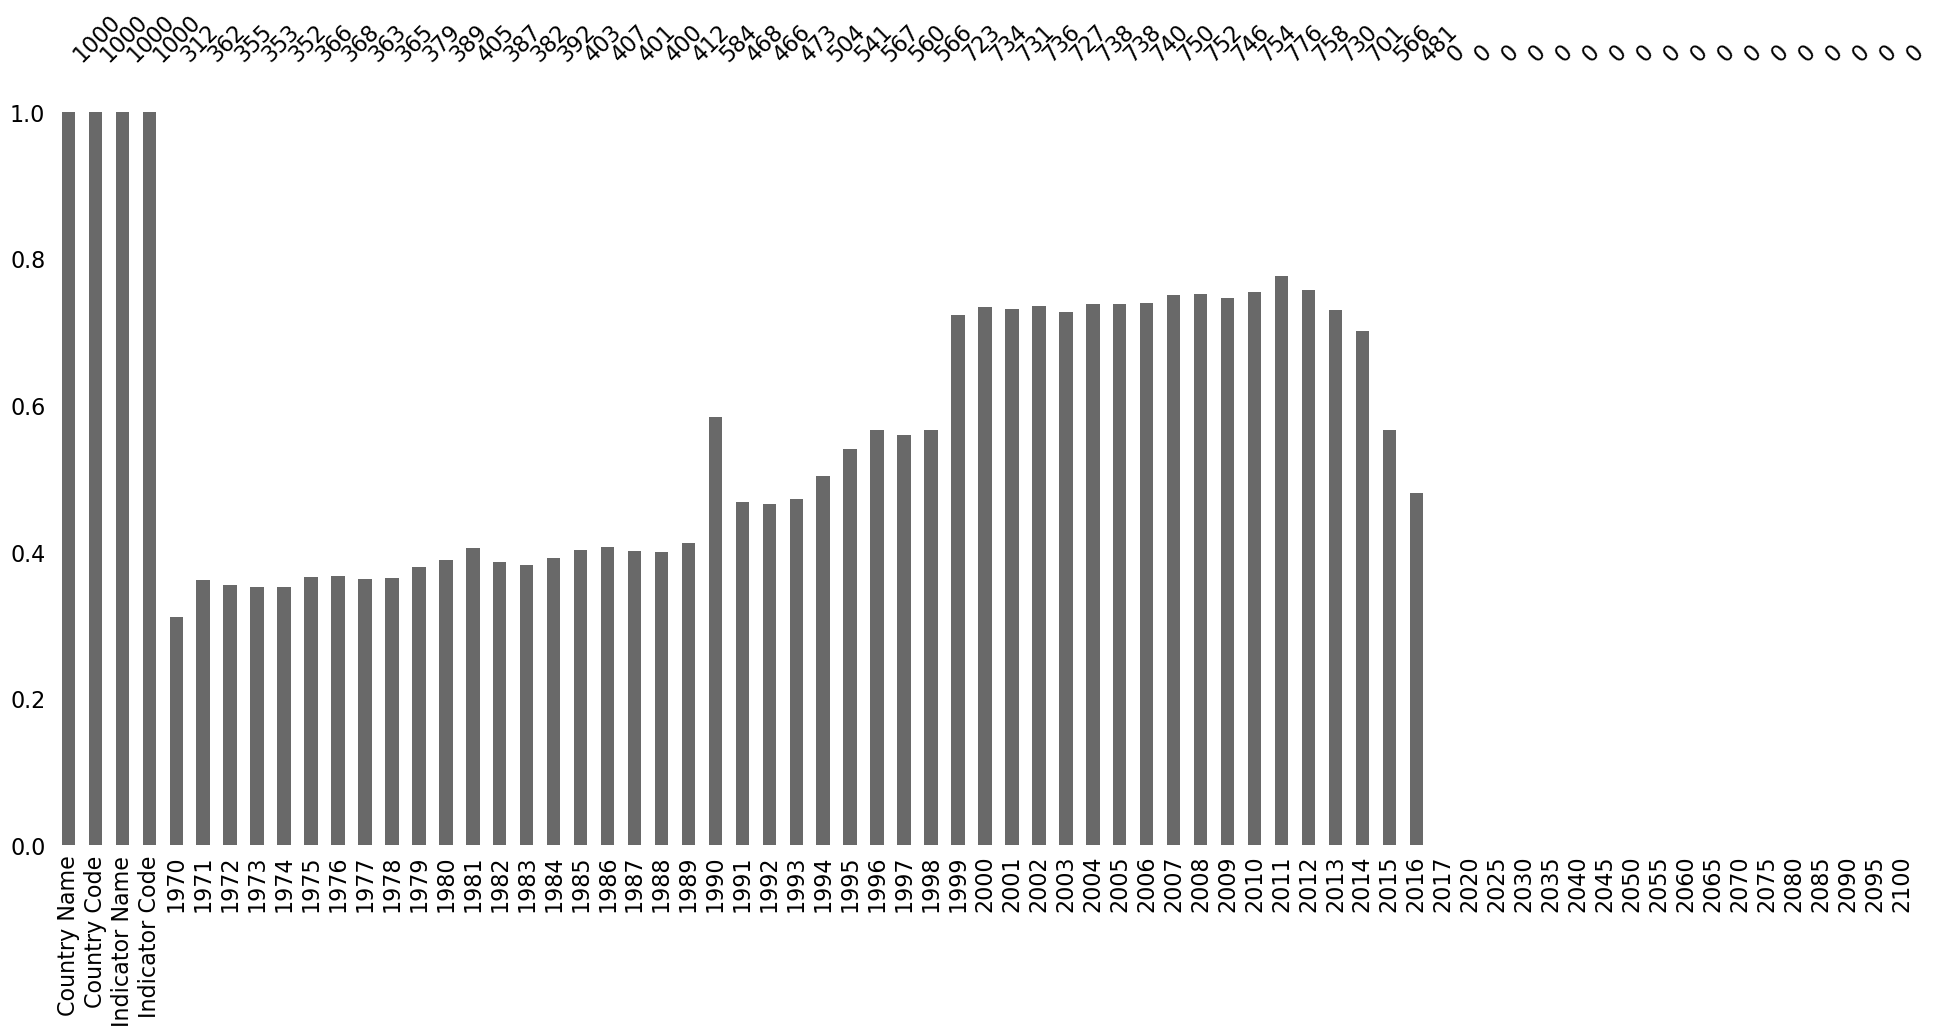

In [33]:
msno.bar(df.sample(1000))

In [34]:
df = df.loc[:,['Country Name','Country Code','Indicator Name','Indicator Code','2011','2012','2013','2014','2015','2016']]

J'ai choisi les dernières années ayant des valeurs (années les plus proches)

# Analyse des données historiques

Création de 2 dataframes par pays et par zone

In [35]:
liste_zone = ['ARB','EAS','EAP','EMU','ECS','ECA','EUU','HPC','HIC','LCN','LAC','LDC','LMY','LIC','LMC','MEA','MNA',
              'MIC','NAC','OED','SAS','SSF','SSA','UMC','WLD']
df_par_zone = df.loc[df['Country Code'].isin(liste_zone),:]
df_par_pays = df.loc[~df['Country Code'].isin(liste_zone),:]

Création d'un dataframe par région (les zones se recoupent)

In [36]:
liste_regions = df2['Region'].unique()
df_par_region = df_par_zone.loc[df['Country Name'].isin(liste_regions)]

 Création d'une colonne moyenne des années dans df_par_pays

In [37]:
df_par_pays['moyenne_annees'] = df_par_pays.mean(axis = 1)

C:\Users\matth\AppData\Local\Temp\ipykernel_19012\2561132277.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_par_pays['moyenne_annees'] = df_par_pays.mean(axis = 1)
C:\Users\matth\AppData\Local\Temp\ipykernel_19012\2561132277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_par_pays['moyenne_annees'] = df_par_pays.mean(axis = 1)


Répartition de la population par région en 2016

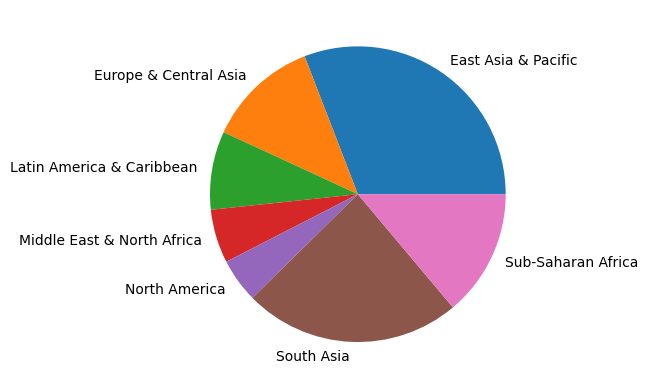

In [38]:
donnees = df_par_region.loc[df_par_region['Indicator Code'] == 'SP.POP.TOTL', ['2016','Country Name']]
plt.pie(x= donnees['2016'], labels = donnees['Country Name'] )
plt.show()

En terme de population, l'Asie arrive très largement en tête suivie par l'Afrique Sub-Saharienne et l'Europe

Pour chaque région, répartition de la population par pays

Création d'une colonne région dans df_par_pays

In [39]:
df_par_pays = pd.merge(df2[['Country Code','Region']],df_par_pays, on = 'Country Code')

Suppression du nan dans liste_regions

In [40]:
liste_regions = ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America']

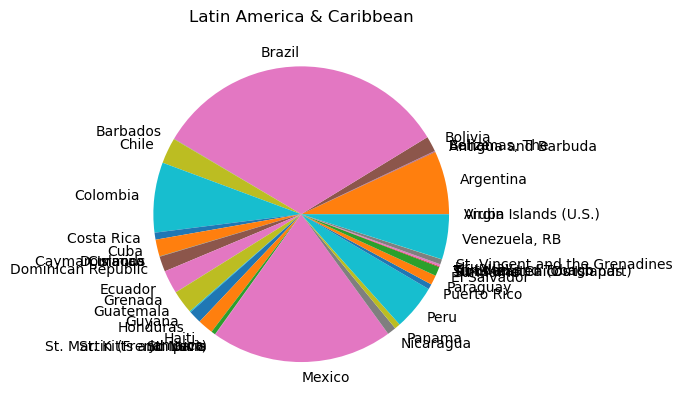

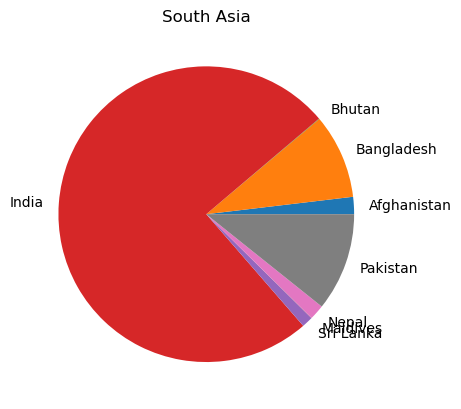

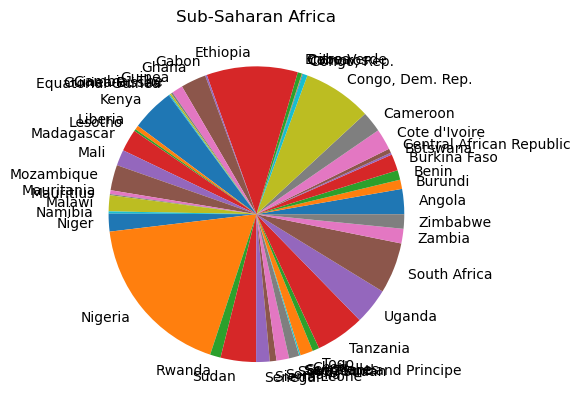

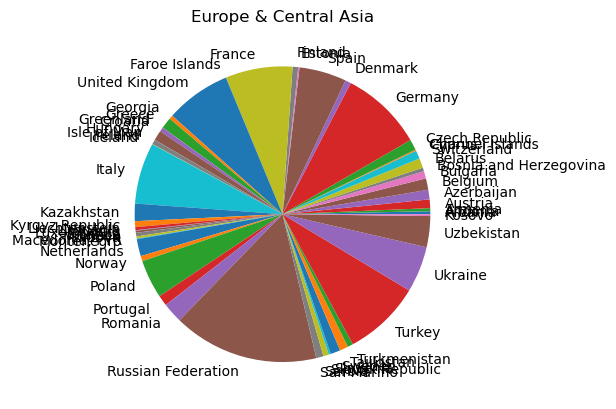

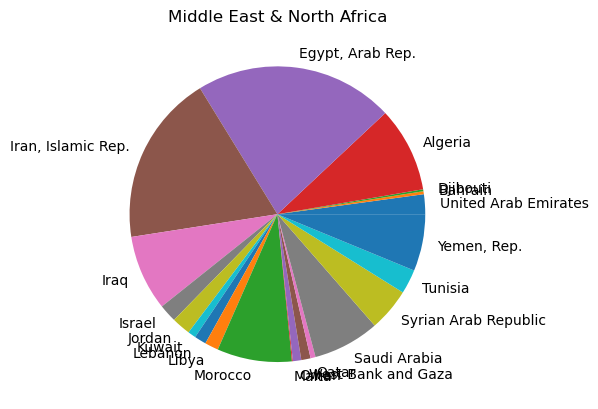

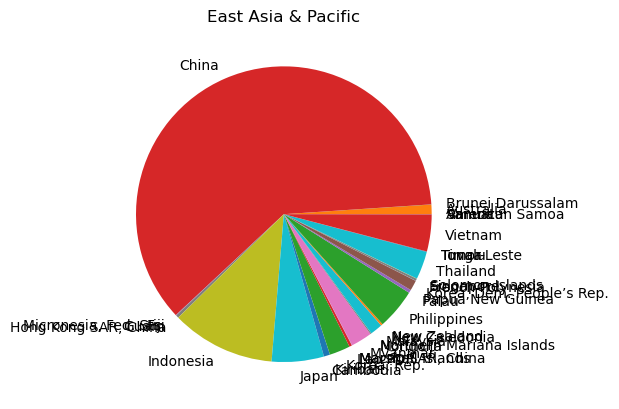

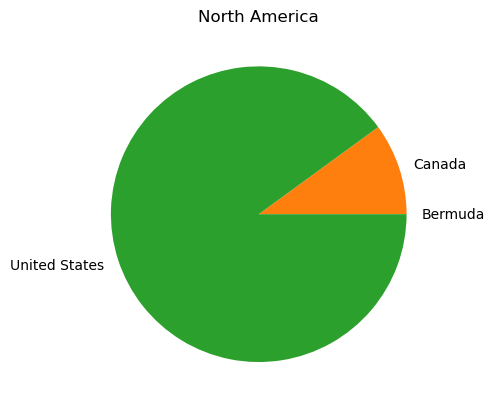

In [41]:
for region in liste_regions :
    donnees = df_par_pays.loc[(df_par_pays['Region'] == region) & (df_par_pays['Indicator Code'] == 'SP.POP.TOTL'),
                              ['Country Name','moyenne_annees']]
    plt.pie(x = donnees['moyenne_annees'] , labels = donnees['Country Name'])
    plt.title(region)
    plt.show()


Il faut filtrer certains "petits pays". La zone Amérique du Nord (qui arrivait en dernière position) est principalement représentée par les USA. Il ne faudra donc pas négliger cette zone.

Nouveaux graphiques plus lisibles de la répartition de la population

In [42]:
regroupement_petits_pays = df_par_pays.loc[(df_par_pays['Indicator Name'] == 'Population, total') & (df_par_pays['moyenne_annees'] < 2000000),['Region','moyenne_annees']].groupby('Region').sum()
regroupement_petits_pays.reset_index(inplace = True)
regroupement_petits_pays['Country Code'] = 'Autres'

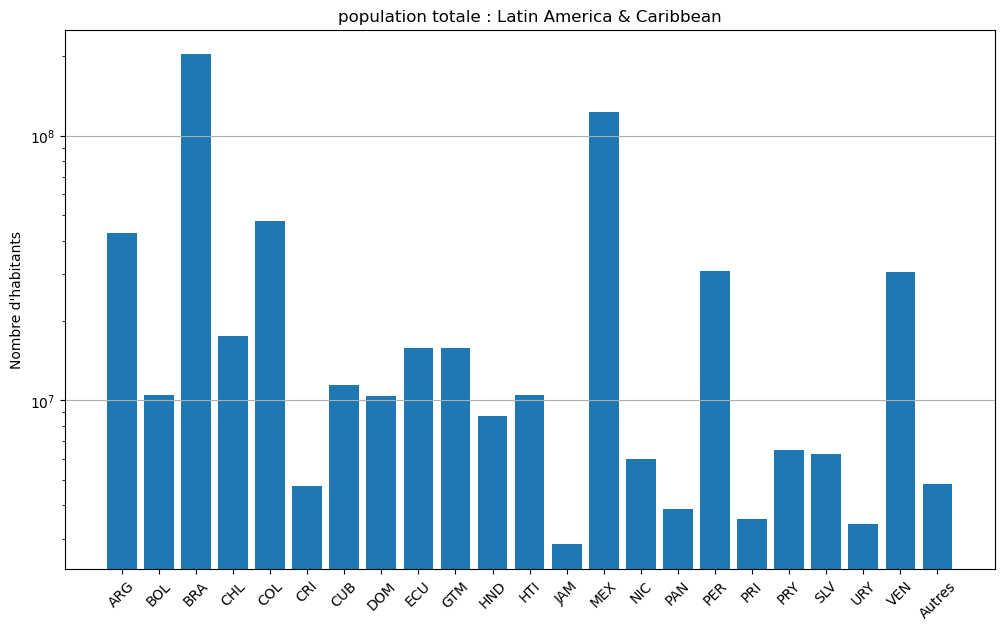

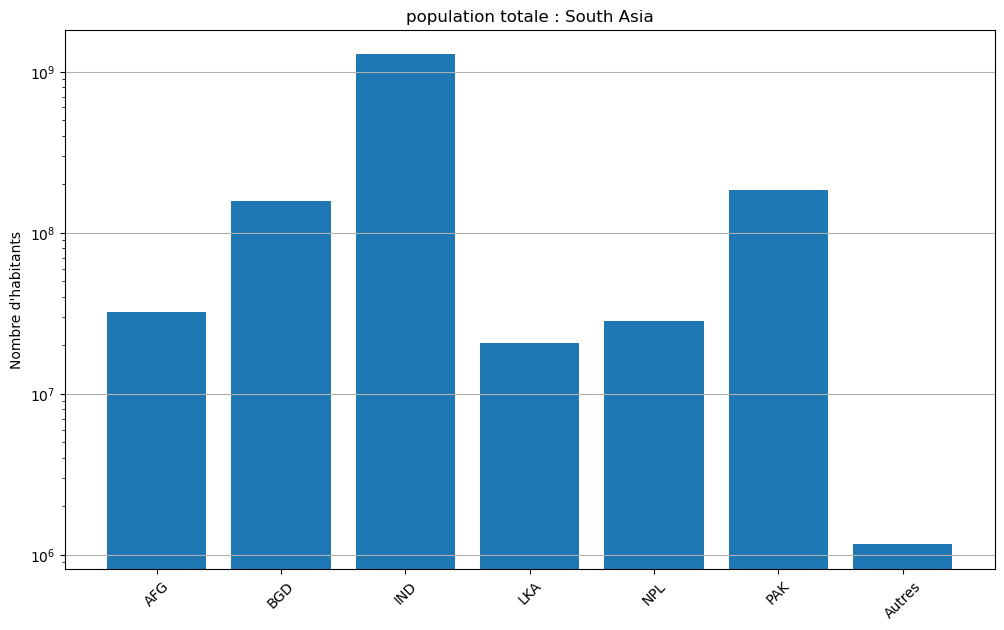

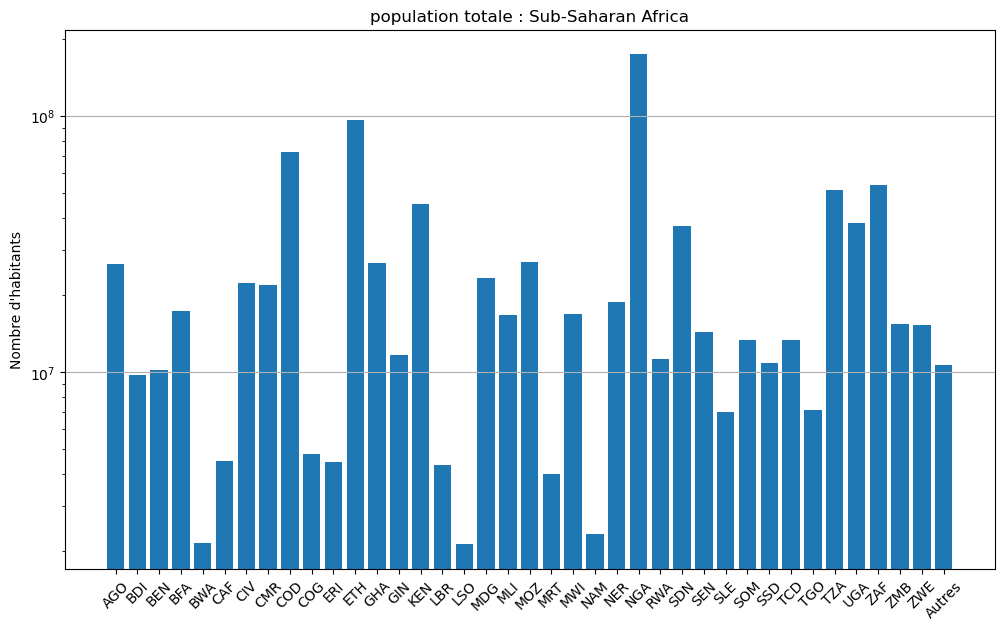

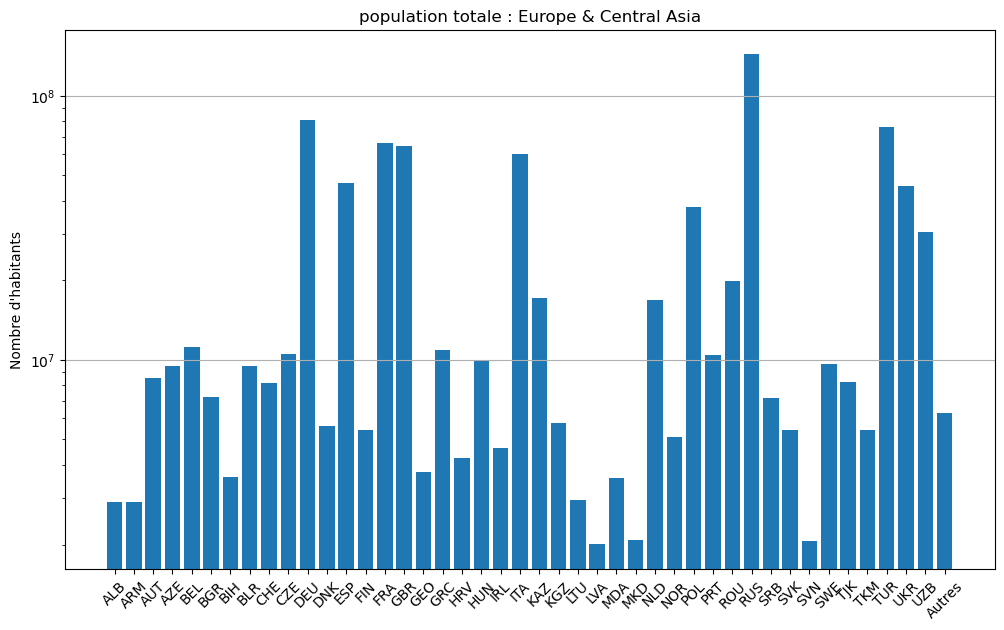

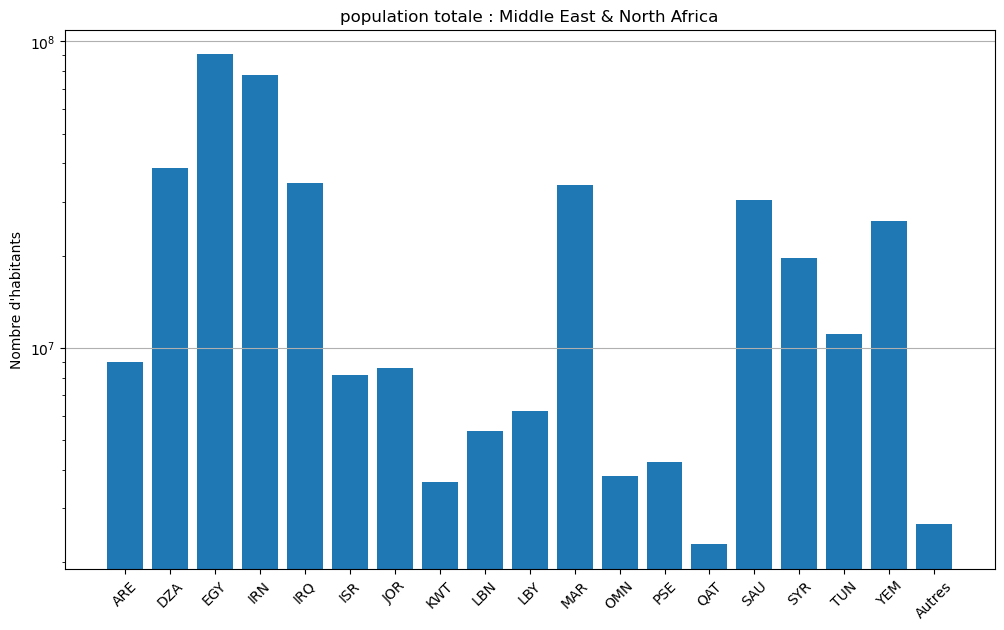

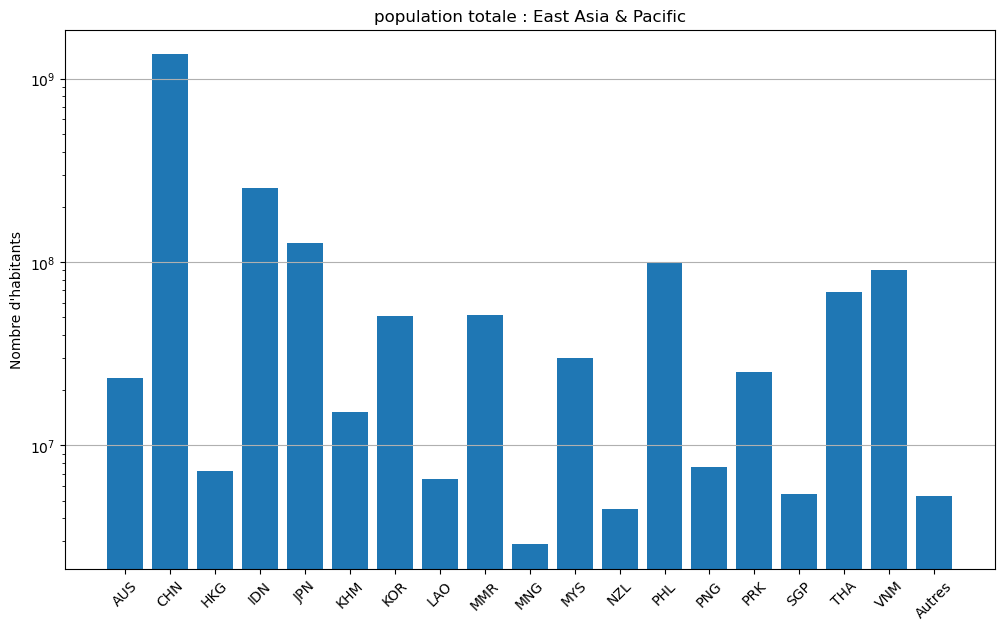

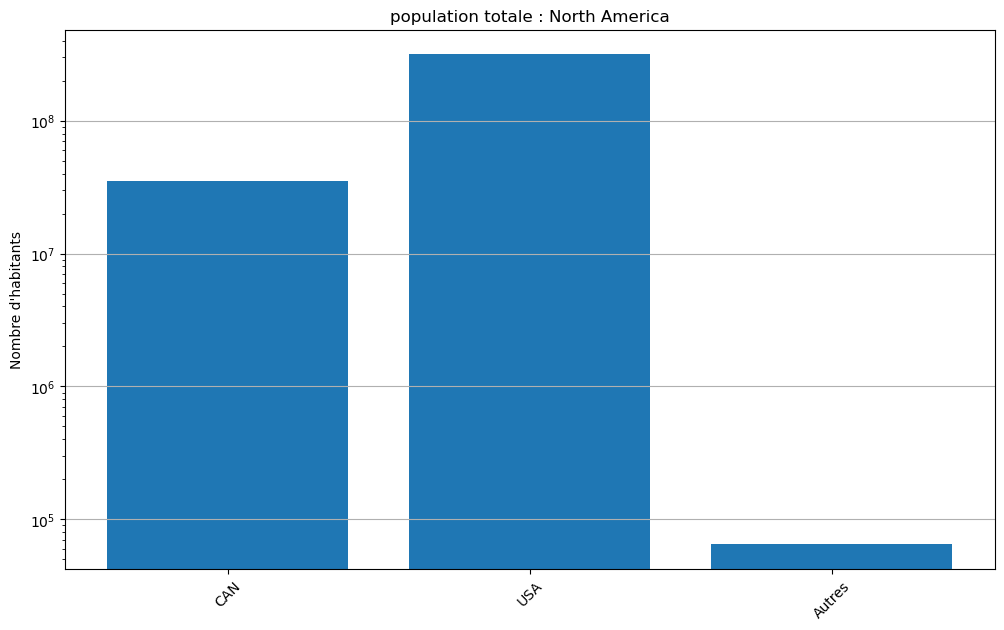

In [43]:
df_popul = df_par_pays.loc[(df_par_pays['Indicator Code'] == 'SP.POP.TOTL') & (df_par_pays['moyenne_annees'] > 2000000),
                            ['Region','Country Code','moyenne_annees']]
df_popul = pd.concat([df_popul,regroupement_petits_pays])

for region in liste_regions :
    donnees = df_popul.loc[(df_popul['Region'] == region),
                              ['Country Code','moyenne_annees']]
    plt.figure(figsize = (12,7))
    plt.bar(height = donnees['moyenne_annees']  , x = donnees['Country Code'], log = True)
    plt.xticks(rotation = 45)
    plt.grid(axis = 'y')
    plt.ylabel('Nombre d\'habitants')
    plt.title('population totale : ' + region)
    plt.show()

Création d'une table avec les indicateurs en colonne

In [44]:
df_par_pays = df_par_pays.pivot(index= ['Country Name','Region'], columns = 'Indicator Name', 
                                values = ['2011','2012','2013','2014','2015','2016','moyenne_annees'])

In [45]:
df_par_pays.head()

2011  \
Indicator Name                            Adult literacy rate, population 15+ years, both sexes (%)   
Country Name   Region                                                                                 
Afghanistan    South Asia                                                           31.74112          
Albania        Europe & Central Asia                                                96.84530          
Algeria        Middle East & North Africa                                                NaN          
American Samoa East Asia & Pacific                                                       NaN          
Andorra        Europe & Central Asia                                                     NaN          

                                                                                                                \
Indicator Name                            Enrolment in tertiary education, all programmes, both sexes (number)   
Country Name   Region                                                                                            
Afghanistan    South Asia                                                            97504.0                     
Albania        Europe & Central Asia                                                134877.0                     
Algeria        Middle East & North Africa                                          1188562.0                     
American Samoa East Asia & Pacific                                                       NaN                     
Andorra        Europe & Central Asia                                                     NaN                     

                                                                                                       \
Indicator Name                            Enrolment in upper secondary education, both sexes (number)   
Country Name   Region                                                                                   
Afghanistan    South Asia                                                           743405.0            
Albania        Europe & Central Asia                                                150134.0            
Algeria        Middle East & North Africa                                          1332584.0            
American Samoa East Asia & Pacific                                                       NaN            
Andorra        Europe & Central Asia                                                  1259.0            

                                                                        \
Indicator Name                            GDP per capita (current US$)   
Country Name   Region                                                    
Afghanistan    South Asia                                   603.537023   
Albania        Europe & Central Asia                       4437.178068   
Algeria        Middle East & North Africa                  5432.413320   
American Samoa East Asia & Pacific                        10375.994215   
Andorra        Europe & Central Asia                      41098.766942   

                                                                           \
Indicator Name                            Internet users (per 100 people)   
Country Name   Region                                                       
Afghanistan    South Asia                                             5.0   
Albania        Europe & Central Asia                                 49.0   
Algeria        Middle East & North Africa                            14.9   
American Samoa East Asia & Pacific                                    NaN   
Andorra        Europe & Central Asia                                 81.0   

                                                             \
Indicator Name                            Population, total   
Country Name   Region                                         
Afghanistan    South Asia                        29708599.0   
Albania        Europe & Central Asia              2905

Suppression des pays dont la population est inférieure à 2 millions

In [46]:
df_par_pays = df_par_pays.loc[((((df_par_pays.loc[:,[('moyenne_annees','Population, total') ]])['moyenne_annees'])['Population, total']) > 2000000),:]

Suppression des pays dont le PIB est inférieur à la valeur médiane

In [47]:
df_par_pays['moyenne_annees'].describe()

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population, total"
count,82.000000,1.320000e+02,1.320000e+02,145.000000,146.000000,1.470000e+02
mean,80.300459,1.476317e+06,1.772545e+06,13486.467074,41.609586,4.878528e+07
std,22.403957,4.498232e+06,6.229599e+06,18952.522948,28.611044,1.577081e+08
min,15.456700,1.220300e+04,2.649100e+04,284.612336,0.000000,2.006401e+06
25%,68.573913,1.320890e+05,1.467204e+05,1398.286054,14.940000,5.712638e+06
50%,92.778586,2.807587e+05,3.678503e+05,5002.033108,42.155518,1.169104e+07
75%,97.069659,8.494479e+05,1.268183e+06,14723.753801,66.130535,3.488662e+07
max,99.986413,3.665544e+07,5.434733e+07,91345.314976,95.600311,1.361060e+09


In [48]:
df_par_pays = df_par_pays.loc[((((df_par_pays.loc[:,[('moyenne_annees','GDP per capita (current US$)') ]])['moyenne_annees'])['GDP per capita (current US$)']) > 5002),:]

Suppression des pays dont l'usage d'internet est trop faible

In [49]:
df_par_pays = df_par_pays.loc[((((df_par_pays.loc[:,[('moyenne_annees','Internet users (per 100 people)') ]])['moyenne_annees'])['Internet users (per 100 people)']) > 20),:]

## Création de scores

Utilisation des moyennes des années

In [50]:
moy_ann = df_par_pays['moyenne_annees']

Transformation du nombre d'inscriptions dans le secondaire et le supérieur par des taux en fonction du nombre d'habitants

In [51]:
moy_ann['Enrolment in tertiary education, all programmes, both sexes (rate)'] = moy_ann['Enrolment in tertiary education, all programmes, both sexes (number)']/moy_ann['Population, total']*100

moy_ann['Enrolment in upper secondary education, both sexes (rate)'] = moy_ann['Enrolment in upper secondary education, both sexes (number)']/moy_ann['Population, total']*100


C:\Users\matth\AppData\Local\Temp\ipykernel_19012\1027490272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_ann['Enrolment in tertiary education, all programmes, both sexes (rate)'] = moy_ann['Enrolment in tertiary education, all programmes, both sexes (number)']/moy_ann['Population, total']*100
C:\Users\matth\AppData\Local\Temp\ipykernel_19012\1027490272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moy_ann['Enrolment in upper secondary education, both sexes (rate)'] = moy_ann['Enrolment in 

<AxesSubplot:xlabel='Indicator Name'>

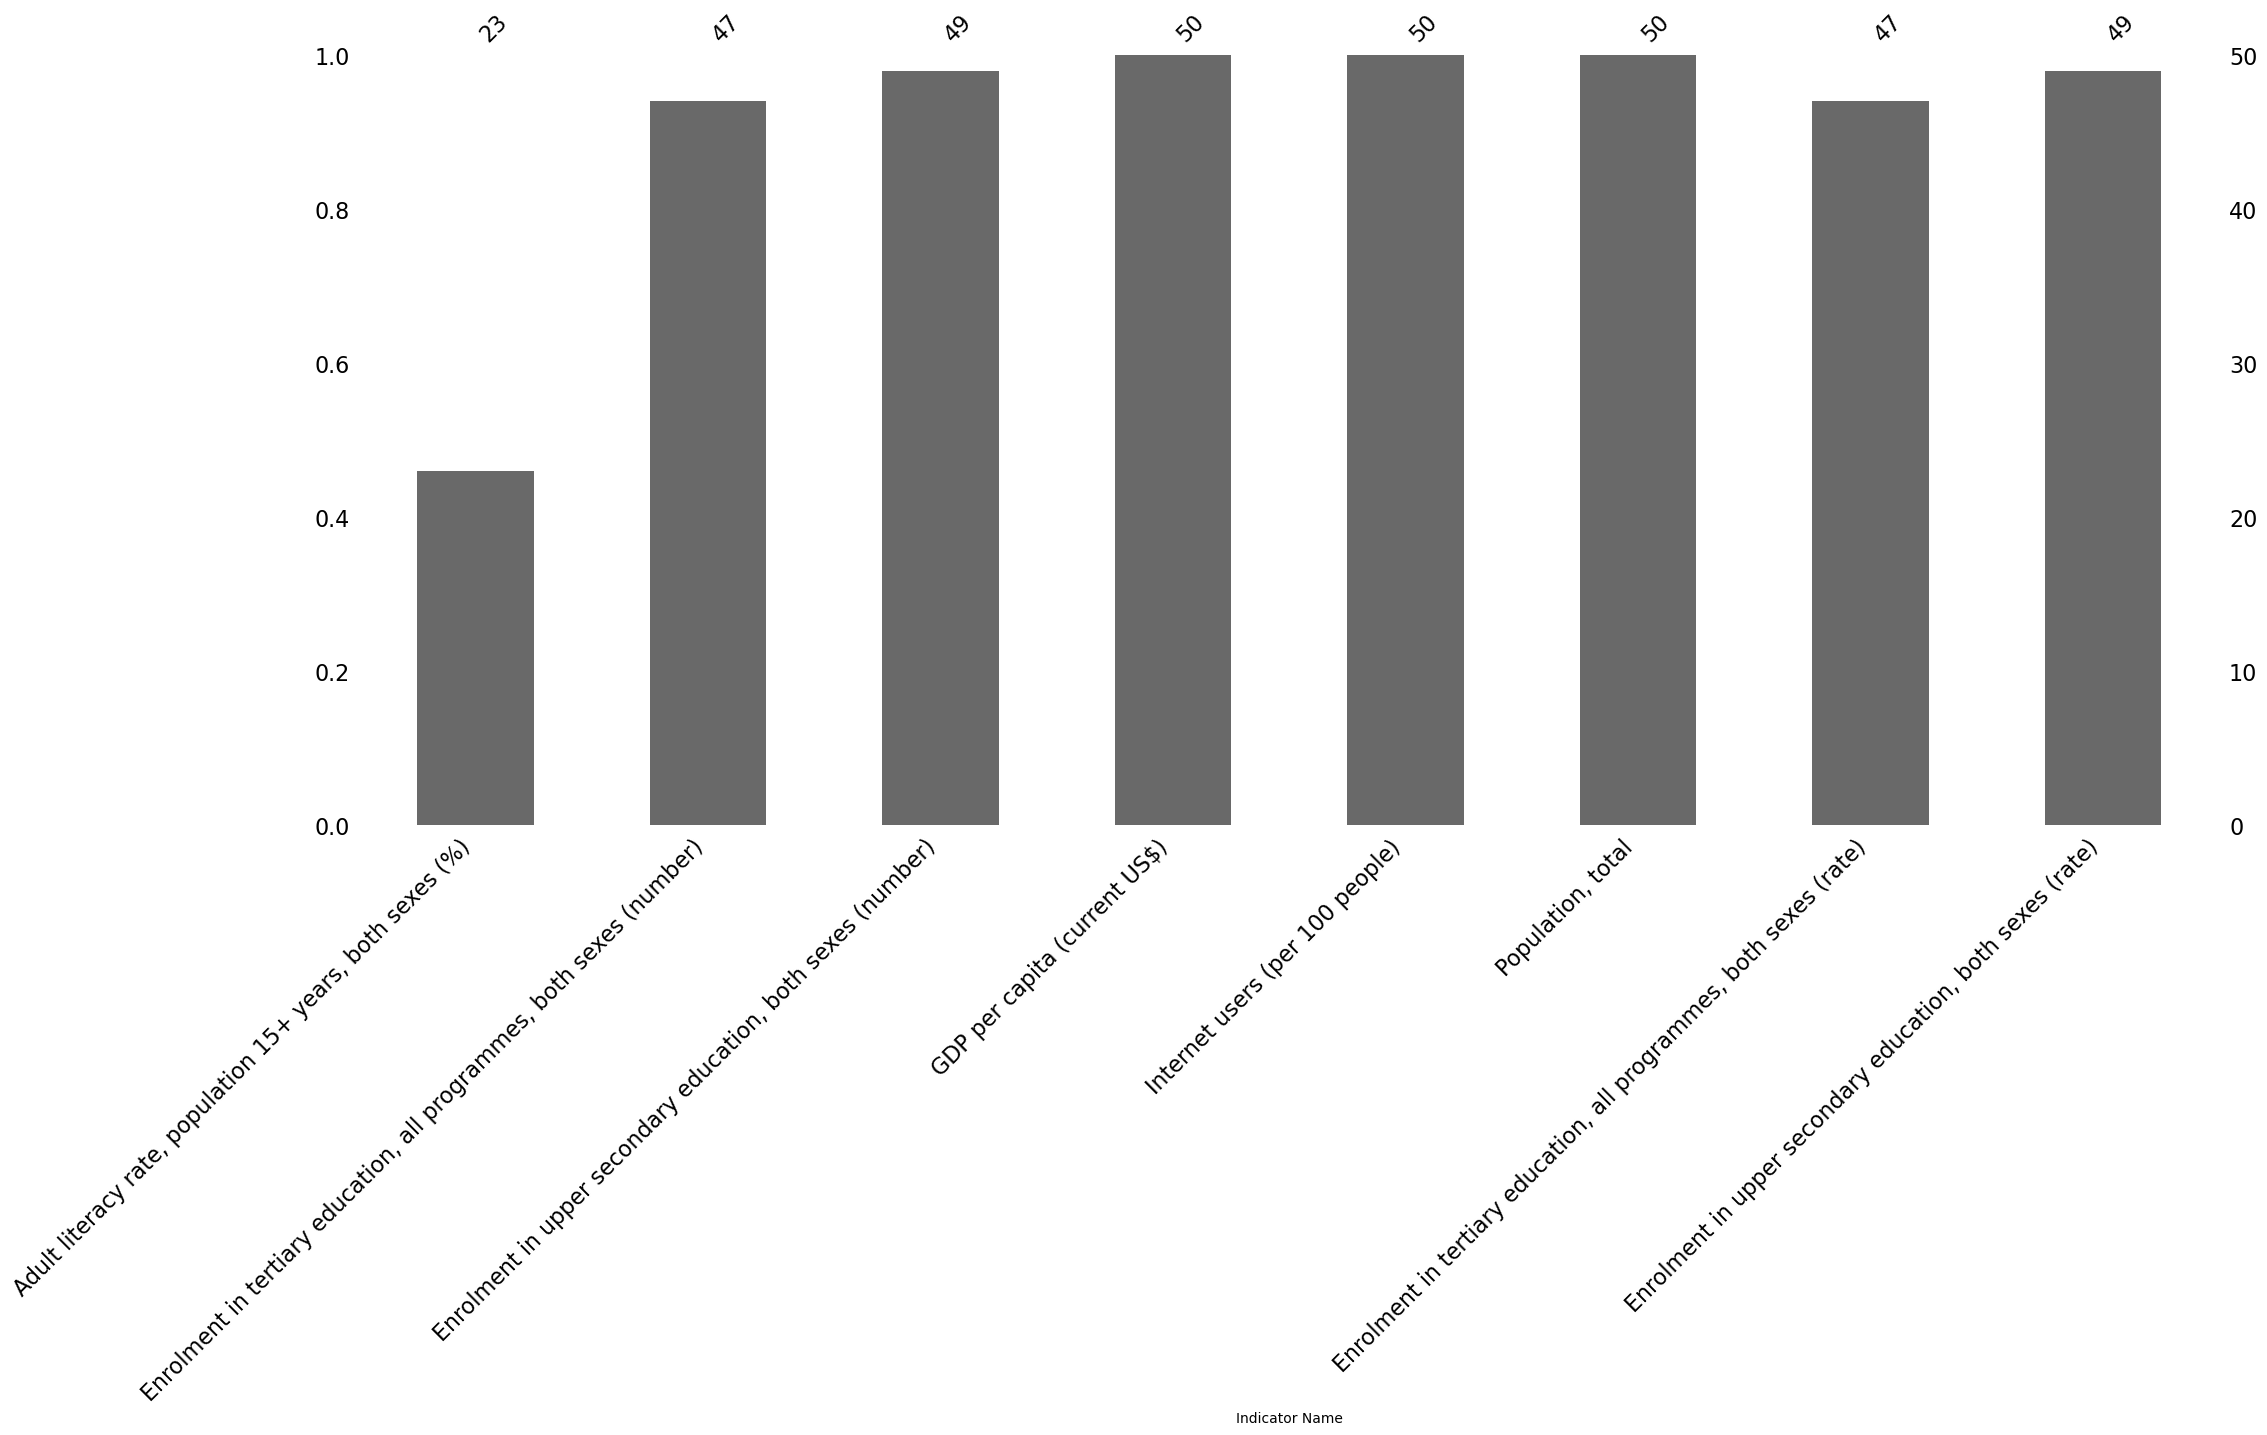

In [52]:
msno.bar(moy_ann.sample(50))

In [53]:
moy_ann.describe()

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population, total","Enrolment in tertiary education, all programmes, both sexes (rate)","Enrolment in upper secondary education, both sexes (rate)"
count,32.000000,6.600000e+01,6.800000e+01,69.000000,69.000000,6.900000e+01,66.000000,68.000000
mean,95.919843,2.005553e+06,1.931457e+06,26058.695445,66.319590,5.213208e+07,4.188244,3.932803
std,3.331515,5.183075e+06,5.620885e+06,21256.762711,17.471812,1.679432e+08,1.311353,0.973325
min,84.319343,2.132820e+04,3.702500e+04,5002.033108,27.707588,2.006401e+06,0.931508,1.580163
25%,93.995813,2.249046e+05,2.318572e+05,9310.414235,53.839889,5.415085e+06,3.420361,3.235002
50%,96.550492,4.339444e+05,4.627036e+05,15603.846619,66.851514,1.052570e+07,4.166861,3.927200
75%,98.404246,1.926026e+06,1.640972e+06,41232.879256,81.441348,4.275671e+07,4.904317,4.620507
max,99.895900,3.665544e+07,4.461014e+07,91345.314976,95.600311,1.361060e+09,6.941399,5.764471


Remplacement des valeurs manquantes par la médiane

In [54]:
valeurs = {'Enrolment in tertiary education, all programmes, both sexes (rate)' : 4.17,
           'Enrolment in upper secondary education, both sexes (rate)' : 3.93,
           'Adult literacy rate, population 15+ years, both sexes (%)' : 96.6}
moy_ann = moy_ann.fillna(value = valeurs)

Création d'un score en ajoutant les indicateurs d'alphabétisation, d'internet, du secondaire(coeff 10), du supérieur(coeff 10) et du PIB(coeff 0.001)

In [55]:
moy_ann['score'] = moy_ann['Adult literacy rate, population 15+ years, both sexes (%)'] + moy_ann['Internet users (per 100 people)'] + moy_ann['Enrolment in tertiary education, all programmes, both sexes (rate)']*10 + moy_ann['Enrolment in upper secondary education, both sexes (rate)']*10 + moy_ann['GDP per capita (current US$)']/1000

In [56]:
moy_ann.sort_values('score',ascending = False).head(10)

,Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population, total","Enrolment in tertiary education, all programmes, both sexes (rate)","Enrolment in upper secondary education, both sexes (rate)",score
Country Name,Region,,,,,,,,,
Norway,Europe & Central Asia,96.6,2.511642e+05,2.469645e+05,91345.314976,95.600311,5.101675e+06,4.923171,4.840851,381.185845
Denmark,Europe & Central Asia,96.6,2.880486e+05,2.940222e+05,58427.339197,94.331335,5.639192e+06,5.107976,5.213907,352.577513
Australia,East Asia & Pacific,96.6,1.383115e+06,1.078240e+06,61068.584385,83.123395,2.326047e+07,5.946203,4.635505,346.609058
Finland,Europe & Central Asia,96.6,3.069654e+05,2.964552e+05,47263.568103,88.460095,5.446226e+06,5.636296,5.443316,343.119779
Switzerland,Europe & Central Asia,96.6,2.782242e+05,3.351118e+05,84263.071872,86.836275,8.140291e+06,3.417865,4.116705,343.045047
Sweden,Europe & Central Asia,96.6,4.422924e+05,4.443200e+05,56492.045112,92.561767,9.661231e+06,4.578013,4.599000,337.423943
New Zealand,East Asia & Pacific,96.6,2.618694e+05,2.538883e+05,40567.978080,84.641258,4.505383e+06,5.812367,5.635220,336.285115
Netherlands,Europe & Central Asia,96.6,8.054310e+05,7.488595e+05,49527.226017,92.006358,1.684597e+07,4.781150,4.445334,330.398423
Belgium,Europe & Central Asia,96.6,4.858548e+05,6.455268e+05,44669.482306,83.511598,1.119837e+07,4.338621,5.764471,325.811995


Les 10 premiers pays selon mon indicateur "score"

Création d'un score2 en ajoutant le PIB(coeff 0.001), les utilisateurs internet et le produit des taux d'inscriptions par la population totale par le taux d'alphabétisation(coeff 1.e-9)

In [57]:
moy_ann['score2'] = moy_ann['GDP per capita (current US$)']/1000 + moy_ann['Internet users (per 100 people)'] + (moy_ann['Enrolment in tertiary education, all programmes, both sexes (rate)'] + moy_ann['Enrolment in upper secondary education, both sexes (rate)'])*moy_ann['Population, total']*moy_ann['Adult literacy rate, population 15+ years, both sexes (%)']/(1.0e+9)

In [58]:
moy_ann.sort_values('score2',ascending = False).head(10)

,Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population, total","Enrolment in tertiary education, all programmes, both sexes (rate)","Enrolment in upper secondary education, both sexes (rate)",score,score2
Country Name,Region,,,,,,,,,,
China,East Asia & Pacific,96.60000,3.665544e+07,4.461014e+07,7154.224386,46.300020,1.361060e+09,2.693154,3.277603,209.761814,838.479791
United States,North America,96.60000,2.024296e+07,1.173509e+07,53788.922245,73.260067,3.174090e+08,6.377563,3.697152,324.396138,435.957007
Brazil,Latin America & Caribbean,91.49069,7.613892e+06,9.595910e+06,11184.936035,52.975283,2.032474e+08,3.746120,4.721295,240.325067,221.613889
Japan,East Asia & Pacific,96.60000,3.872598e+06,3.679303e+06,41449.473258,86.489134,1.273864e+08,3.040040,2.888301,283.822010,200.889965
Norway,Europe & Central Asia,96.60000,2.511642e+05,2.469645e+05,91345.314976,95.600311,5.101675e+06,4.923171,4.840851,381.185845,191.757549
United Kingdom,Europe & Central Asia,96.60000,2.431799e+06,3.386122e+06,42892.938060,90.181700,6.441112e+07,3.775433,5.257046,319.999426,189.275750
Germany,Europe & Central Asia,96.60000,2.889999e+06,2.631724e+06,44807.095203,85.202816,8.111387e+07,3.562891,3.244481,294.683634,183.349755
Russian Federation,Europe & Central Asia,96.60000,7.550406e+06,2.966580e+06,12852.293872,66.851514,1.436547e+08,5.255940,2.065076,249.513968,181.297891
Switzerland,Europe & Central Asia,96.60000,2.782242e+05,3.351118e+05,84263.071872,86.836275,8.140291e+06,3.417865,4.116705,343.045047,177.024172


 Les 10 premiers pays selon mon indicateur "score2"

Graphiques montrant l'évolution des indicateurs sur la période 2011-2016 pour les 10 premiers pays du classement selon "score"

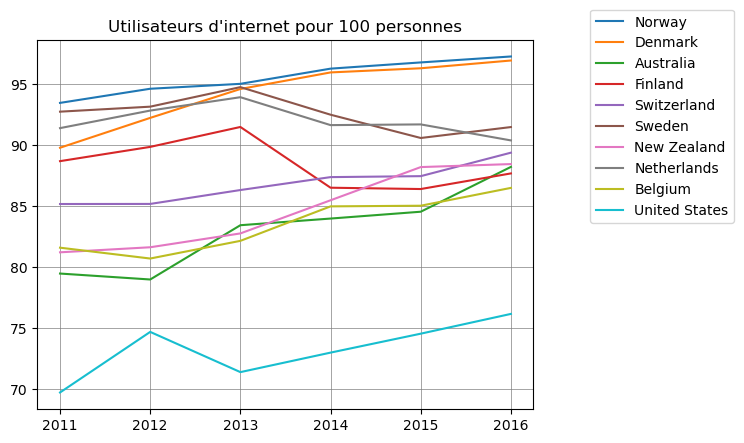

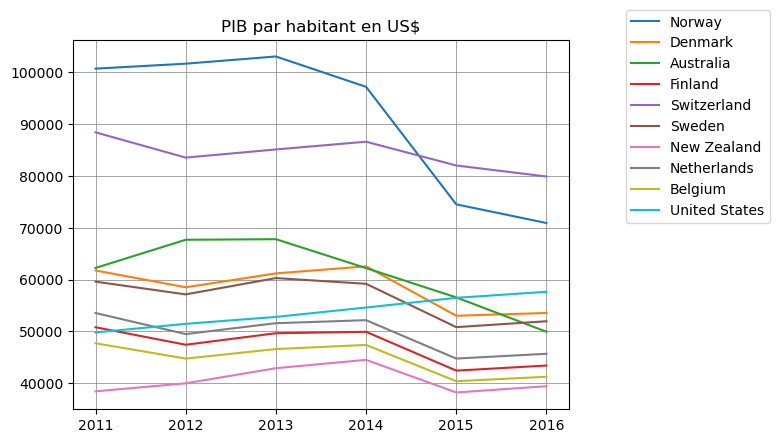

In [59]:
annees = ['2011','2012','2013','2014','2015','2016']
liste_pays = moy_ann.sort_values('score',ascending = False).reset_index()['Country Name']

for pays in liste_pays[:10] :
    df_dessin = df.loc[(df['Country Name'] == pays) & (df['Indicator Name'] == 'Internet users (per 100 people)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_pays[:10],bbox_to_anchor = (1.1,1.1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title('Utilisateurs d\'internet pour 100 personnes')
plt.show()

for pays in liste_pays[:10] :
    df_dessin = df.loc[(df['Country Name'] == pays) & (df['Indicator Name'] == 'GDP per capita (current US$)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_pays[:10],bbox_to_anchor = (1.1,1.1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title('PIB par habitant en US$')
plt.show()


 On remarque une baisse de l'utilisation d'internet pour certains pays (Finlande, Pays-bas, Suéde).
 
 Les PIB suivent sensiblement tous la même tendance hormis :
 - la Norvège qui a une baisse plus forte mais qui reste à un niveau très haut
 - l'Australie qui a une baisse régulière depuis 2013
 - les USA qui ont une augmentation régulière

Graphiques montrant l'évolution des indicateurs sur la période 2011-2016 pour les 10 premiers pays du classement "score2"

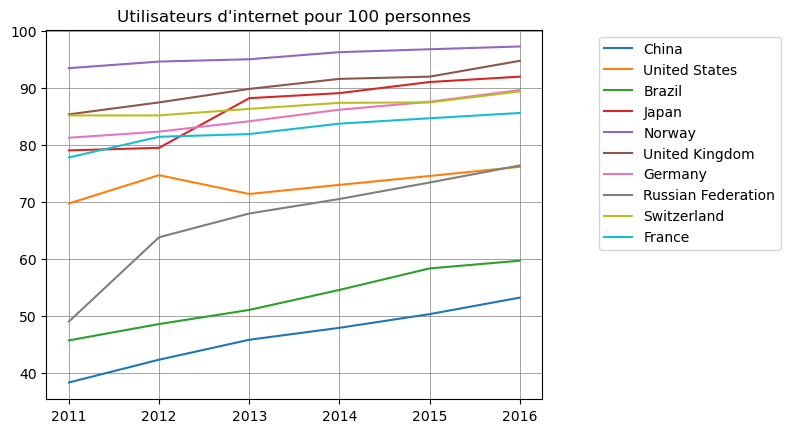

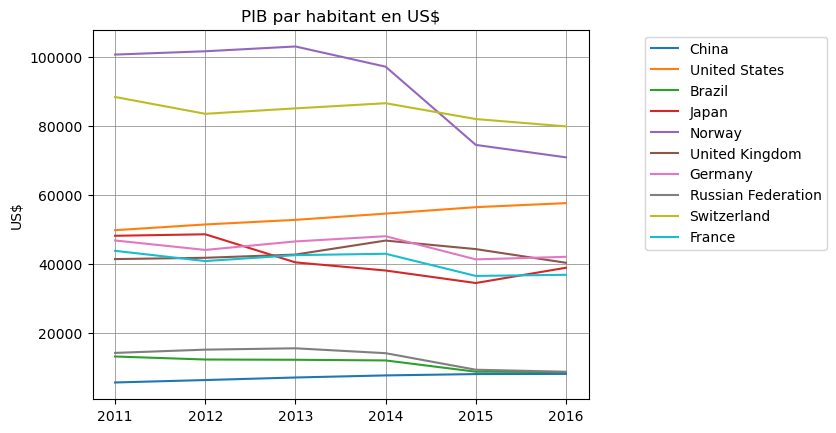

In [60]:
annees = ['2011','2012','2013','2014','2015','2016']
liste_pays = moy_ann.sort_values('score2',ascending = False).reset_index()['Country Name']

for pays in liste_pays[:10] :
    df_dessin = df.loc[(df['Country Name'] == pays) & (df['Indicator Name'] == 'Internet users (per 100 people)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_pays[:10],bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title('Utilisateurs d\'internet pour 100 personnes')
plt.show()

for pays in liste_pays[:10] :
    df_dessin = df.loc[(df['Country Name'] == pays) & (df['Indicator Name'] == 'GDP per capita (current US$)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_pays[:10],bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.ylabel('US$')
plt.title('PIB par habitant en US$')
plt.show()


 Pour ces pays, les utilisateurs d'internet sont tous en augmentation.
 
 Les PIB ont sensiblement tous la même tendance hormis la Norvège.
 
 Par la suite, je garderai le score2 comme référence.

### Regroupement par région

In [61]:
moy_ann_region = moy_ann.reset_index().groupby('Region').sum().sort_values('score2',ascending = False)
moy_ann_region

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),"Population, total","Enrolment in tertiary education, all programmes, both sexes (rate)","Enrolment in upper secondary education, both sexes (rate)",score,score2
Region,,,,,,,,,,
Europe & Central Asia,3206.140313,3.464571e+07,3.004843e+07,976187.775907,2411.621858,7.827386e+08,142.473019,135.049534,9369.175470,4013.690673
East Asia & Pacific,866.101138,4.941782e+07,5.521604e+07,286477.621690,643.059919,1.677628e+09,39.395284,35.084880,2540.440314,1940.860770
Latin America & Caribbean,1337.430758,1.902256e+07,2.204110e+07,159444.737084,713.352468,5.488465e+08,62.979348,53.604843,3376.069879,1281.889226
Middle East & North Africa,850.327902,7.965946e+06,7.759666e+06,259555.441491,574.417562,1.792517e+08,29.244558,31.102498,2287.771463,974.948245
North America,193.200000,2.024296e+07,1.336536e+07,102606.703740,159.465067,3.527304e+08,10.547563,8.312659,643.873994,600.956352
Sub-Saharan Africa,190.434857,1.071486e+06,2.908466e+06,13777.705807,74.134818,5.591876e+07,4.294352,8.206187,403.352775,125.289924


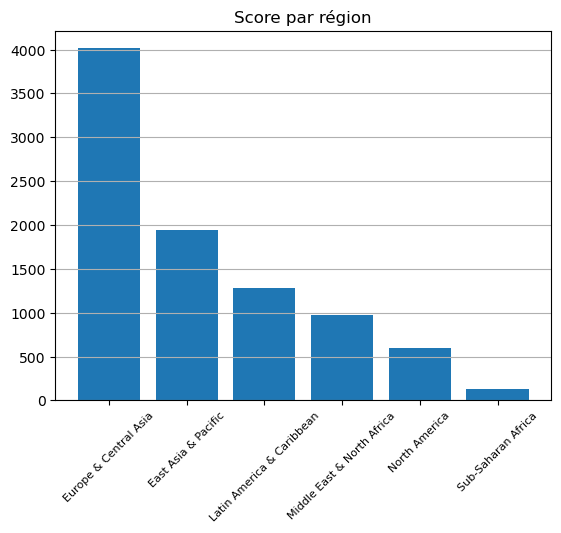

In [62]:
plt.bar(height = moy_ann_region['score2'], x = moy_ann_region.reset_index()['Region'])
plt.xticks(fontsize = 8, rotation = 45)
plt.title('Score par région')
plt.grid(axis = 'y')


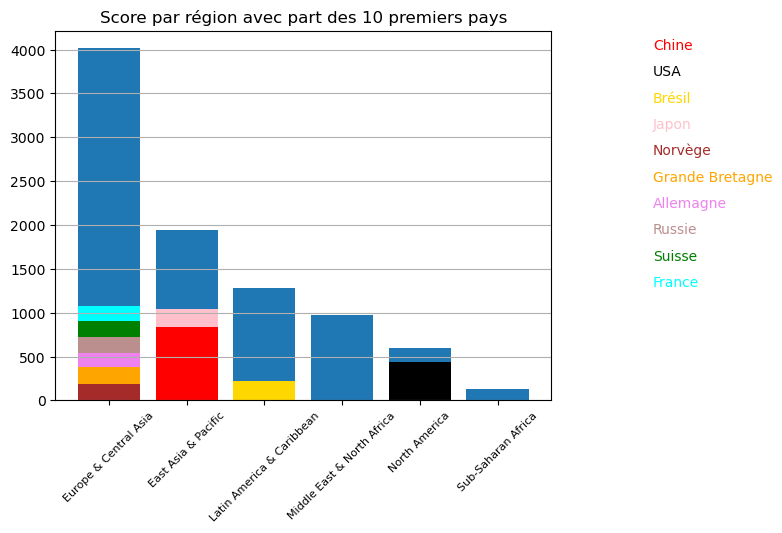

In [63]:
plt.bar(height = moy_ann_region['score2'], x = moy_ann_region.reset_index()['Region'])
plt.xticks(fontsize = 8, rotation = 45)
plt.title('Score par région avec part des 10 premiers pays')
plt.grid(axis = 'y')

plt.bar(height = [0,838,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'red') #Chine
plt.bar(bottom = 838, height = [0,201,0,0,0,0],x = moy_ann_region.reset_index()['Region'], color = 'pink') #Japon
plt.bar(height = [0,0,0,0,436,0], x = moy_ann_region.reset_index()['Region'], color = 'black' ) #USA
plt.bar(height = [0,0,222,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'gold' ) #Brésil
plt.bar(height = [192,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'brown' ) #Norvège
plt.bar(bottom = 192, height = [189,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'orange' ) #Grande Bretagne
plt.bar(bottom = 381, height = [183,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'violet' ) #Allemagne
plt.bar(bottom = 544, height = [181,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'rosybrown' ) #Russie
plt.bar(bottom = 725, height = [177,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'green' ) #Suisse
plt.bar(bottom = 902, height = [171,0,0,0,0,0], x = moy_ann_region.reset_index()['Region'], color = 'cyan' ) #France

plt.text(x = 7, y = 4000 , s = 'Chine', color = 'red')
plt.text(x = 7, y = 3700 , s = 'USA', color = 'black')
plt.text(x = 7, y = 3400 , s = 'Brésil', color = 'gold')
plt.text(x = 7, y = 3100, s = 'Japon', color = 'pink')
plt.text(x = 7, y = 2800 , s = 'Norvège', color = 'brown')
plt.text(x = 7, y = 2500 , s = 'Grande Bretagne', color = 'orange')
plt.text(x = 7, y = 2200 , s = 'Allemagne', color = 'violet')
plt.text(x = 7, y = 1900 , s = 'Russie', color = 'rosybrown')
plt.text(x = 7, y = 1600 , s = 'Suisse', color = 'green')
plt.text(x = 7, y = 1300 , s = 'France', color = 'cyan')

plt.show()


On pourrait penser que le premier graphique va nous donner l'ordre dans lequel il serait préférable d'investir les zones géographiques. Il est à noter que la zone Asie du sud n'apparaît pas (aucun pays n'a obtenu les critères minimums).

Mais en observant le deuxième graphique, on remarque qu'il serait plus judicieux de partir dans cet ordre :
- la zone Asie de l'est et Pacifique (notamment pour la Chine et le Japon) 
- l'Europe (pour la présence de plusieurs pays qui arrivent en haut du classement)
- l'Amérique du nord (pour les USA)
- la zone Amérique latine et Caraïbes (pour le Brésil)

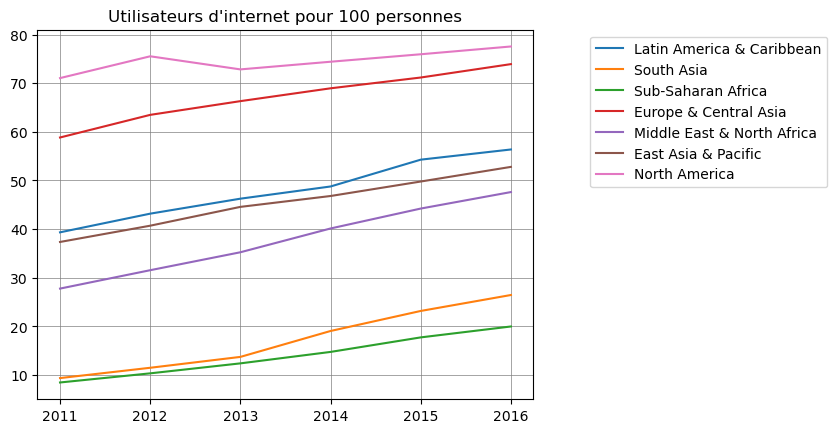

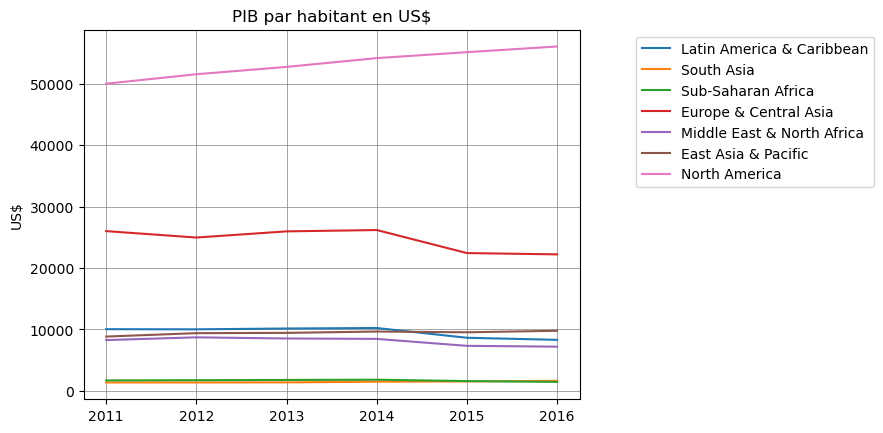

In [64]:
for reg in liste_regions :
    df_dessin = df.loc[(df['Country Name'] == reg) & (df['Indicator Name'] == 'Internet users (per 100 people)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_regions,bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title('Utilisateurs d\'internet pour 100 personnes')
plt.show()

for reg in liste_regions :
    df_dessin = df.loc[(df['Country Name'] == reg) & (df['Indicator Name'] == 'GDP per capita (current US$)'),:]
    plt.plot(annees,[df_dessin[an] for an in annees])
plt.legend(liste_regions,bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.title('PIB par habitant en US$')
plt.ylabel('US$')
plt.show()

 Les courbes ont toutes sensiblement la même tendance hormis le PIB pour l'Amérique du nord qui est en constante augmentation.
 
 Les informations à retenir sont les points de départ de chaque zone. 
 
 Les 4 premières zones correspondent au classement donné précédemment.

Top 5 par région

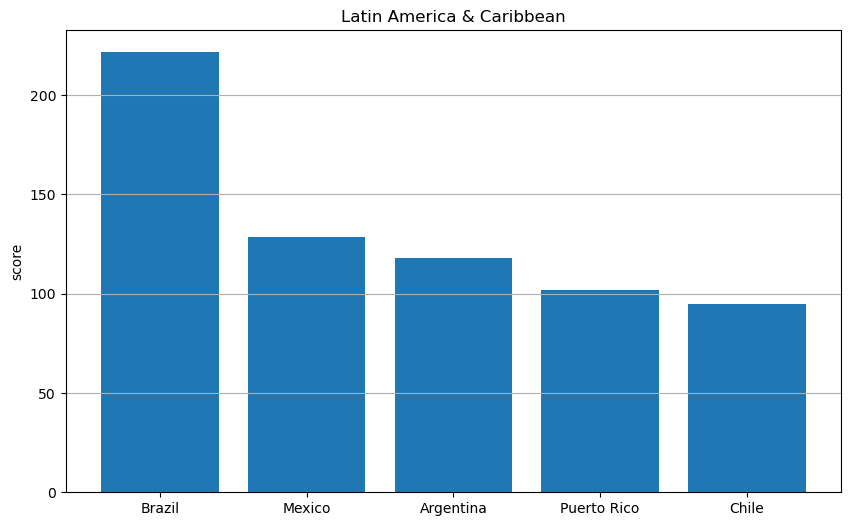

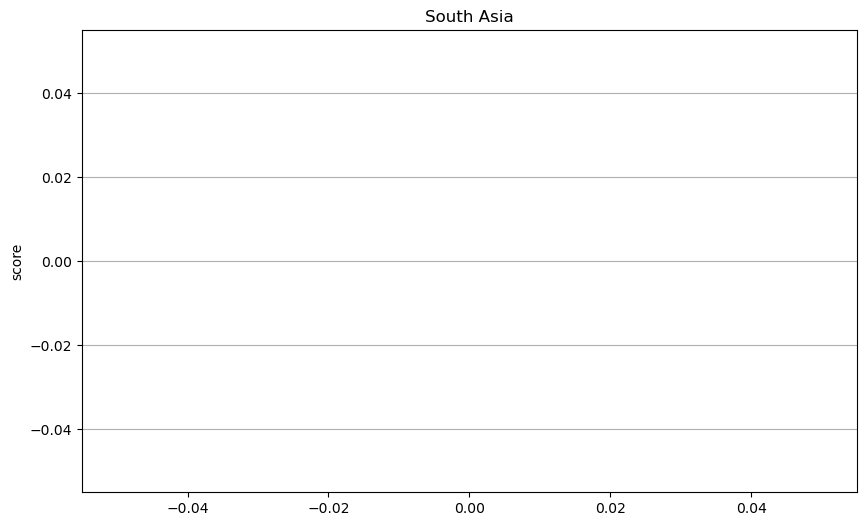

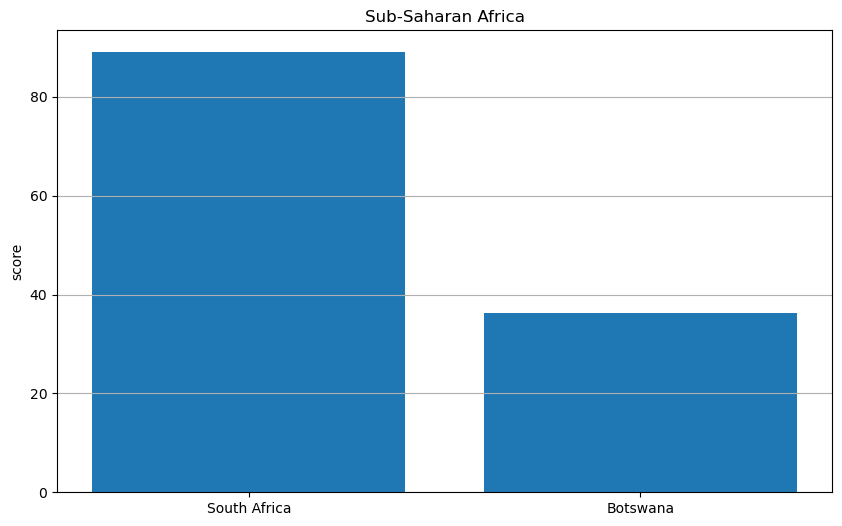

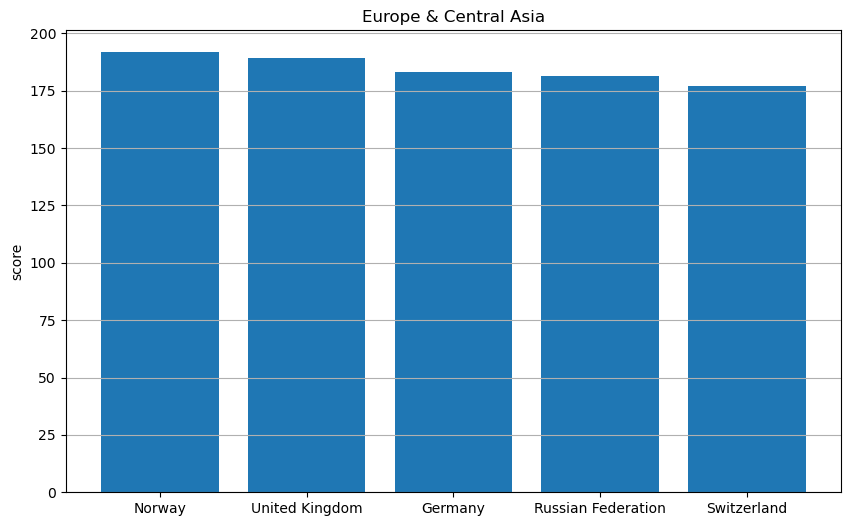

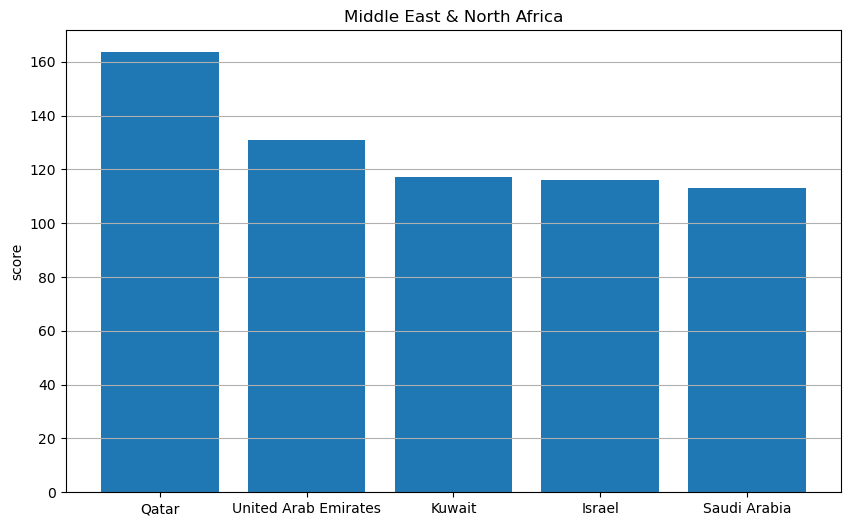

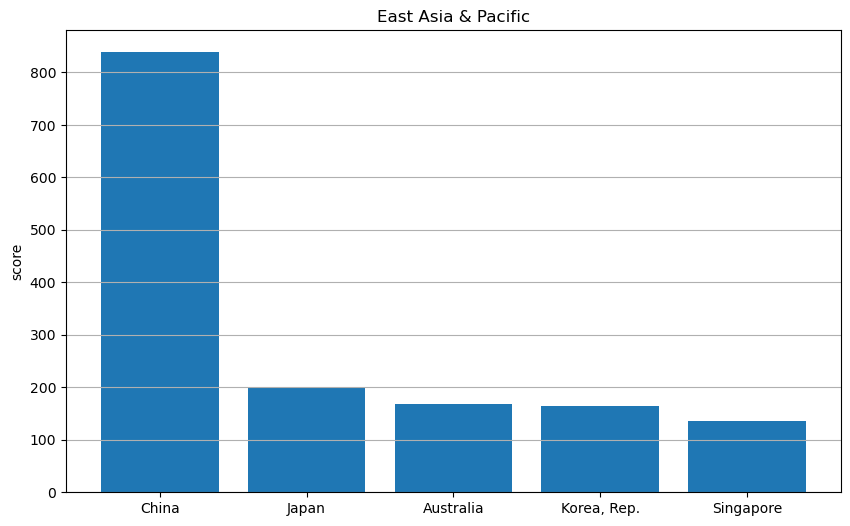

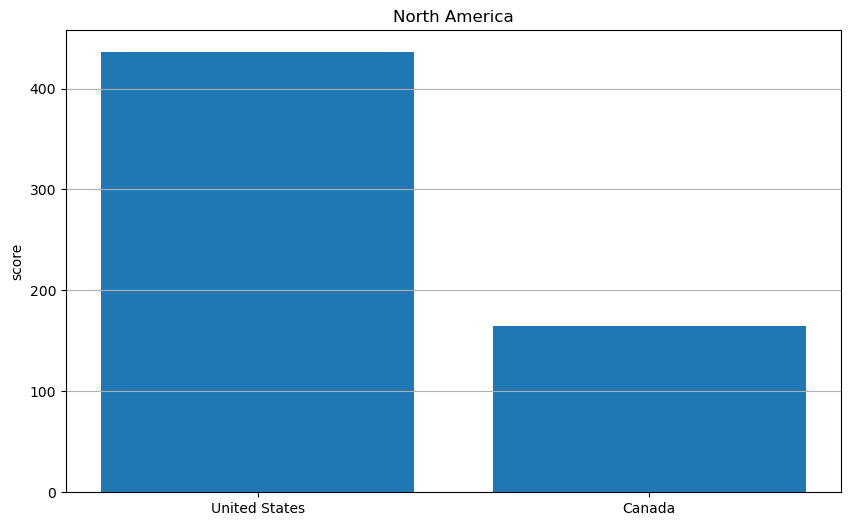

In [65]:
for reg in liste_regions :
    donnees = moy_ann.reset_index()
    donnees = donnees.loc[donnees['Region'] == reg,:]
    donnees = donnees.sort_values('score2',ascending = False)[:5]
    plt.figure(figsize = (10,6))
    plt.bar(height = donnees['score2'], x = donnees['Country Name'])
    plt.title(reg)
    plt.ylabel('score')
    plt.grid(axis = 'y')
    plt.show()

# Analyse des données de projection

Création d'un dataframe sur les annnées 2020 à 2040

In [66]:
df_proj = pd.read_csv('EdStatsData.csv',sep=',')
df_proj = df_proj.loc[:,['Country Name','Country Code','Indicator Name','Indicator Code','2020','2025','2030','2035','2040']]      

Restriction aux pays selectionnés et au monde(qui servira de repére)  

In [67]:
liste_pays = moy_ann.sort_values('score2',ascending = False).reset_index()['Country Name']
liste_pays_monde = pd.concat([liste_pays[:9],pd.Series(['World'])])
df_proj = df_proj.loc[df_proj['Country Name'].isin(liste_pays_monde),:]

Choix des indicateurs

<AxesSubplot:>

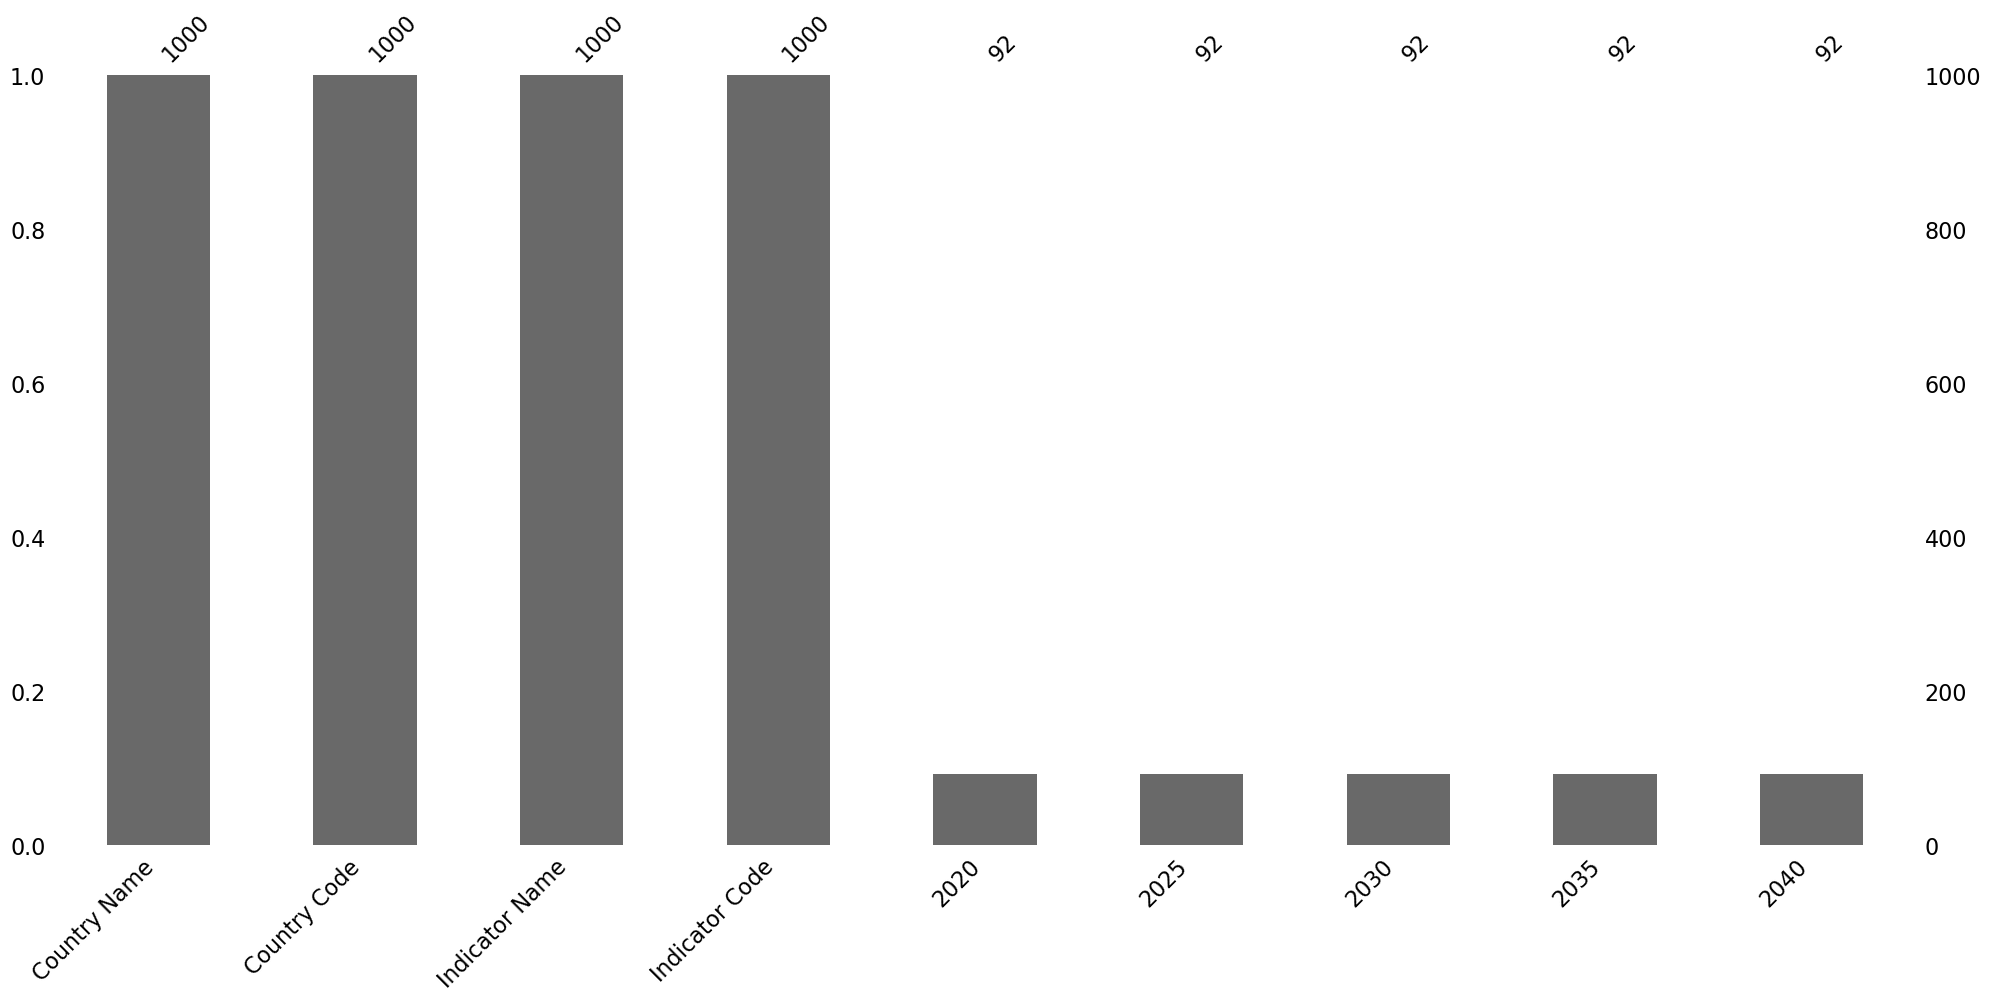

In [68]:
msno.bar(df_proj.sample(1000))

Suppression des lignes ne contenant que des valeurs manquantes

In [69]:
df_proj = df_proj.loc[~(df_proj['2020'].isna() & df_proj['2025'].isna() & df_proj['2030'].isna() & df_proj['2035'].isna() & df_proj['2040'].isna()) ,:]

In [70]:
df_proj['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

Suppression des mots clés "Male" et "Female"

In [71]:
df_proj = df_proj.loc[~df_proj['Indicator Name'].str.contains('Male|Female')]

Suppression des "Mean years"

In [72]:
df_proj = df_proj.loc[~df_proj['Indicator Name'].str.contains('Mean years|Mean Years')]

Choix des indicateurs

In [73]:
liste_ind = ['Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total',
            'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total']
df_proj = df_proj.loc[df_proj['Indicator Name'].isin(liste_ind),:]

Graphiques

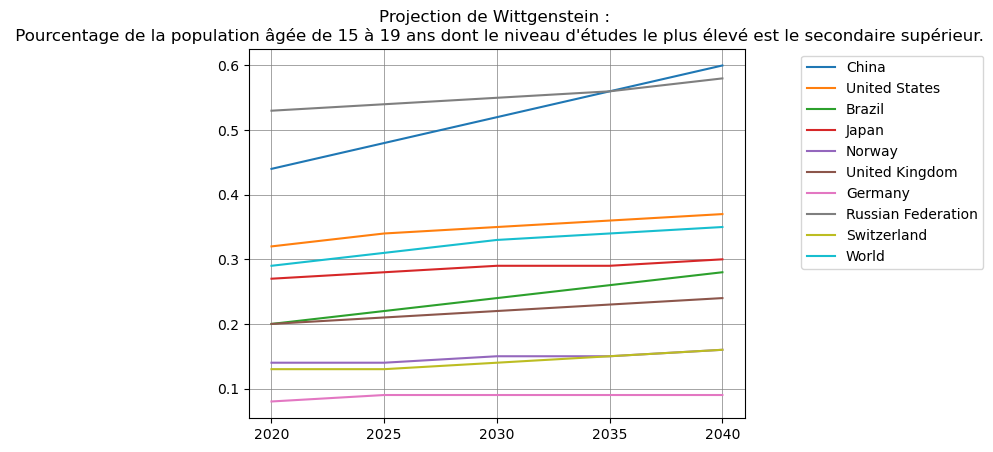

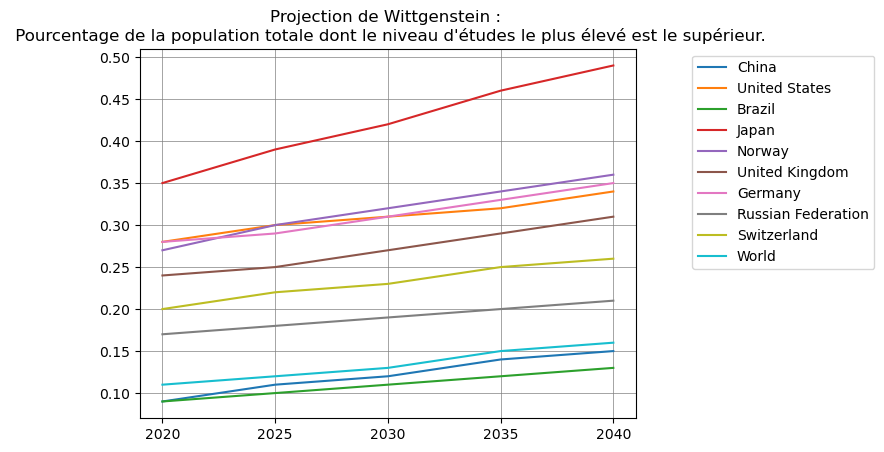

In [74]:
annees = ['2020','2025','2030','2035','2040']

for pays in liste_pays_monde :
    df_dessin = df_proj.loc[(df_proj['Country Name'] == pays) & (df_proj['Indicator Code'] == 'PRJ.ATT.1519.3.MF'),:]
    plt.plot(annees, [df_dessin[an] for an in annees])
plt.legend(liste_pays_monde,bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle = '-', linewidth=0.5)
plt.title('Projection de Wittgenstein : \n Pourcentage de la population âgée de 15 à 19 ans dont le niveau d\'études le plus élevé est le secondaire supérieur.')
plt.show()

for pays in liste_pays_monde :
    df_dessin = df_proj.loc[(df_proj['Country Name'] == pays) & (df_proj['Indicator Code'] == 'PRJ.ATT.ALL.4.MF'),:]
    plt.plot(annees, [df_dessin[an] for an in annees])
plt.legend(liste_pays_monde,bbox_to_anchor = (1.1,1))
plt.grid(color='gray', linestyle = '-', linewidth=0.5)
plt.title('Projection de Wittgenstein : \n Pourcentage de la population totale dont le niveau d\'études le plus élevé est le supérieur.')
plt.show()


Les courbes ont sensiblement la même tendance que celle du monde(le repère).

Il est à noter que, dans le premier graphique, la Chine a une progression plus importante, en cohérence avec le classement.

## Conclusion

Je conseille de commencer par la Chine, les USA et le Brésil.

Par la suite, il faudra s'installer en Europe en commençant par la Norvège, la Grande Bretagne, l'Allemagne et la Suisse puis le Japon et la Russie.

Pour une expansion par région : 

    -Amérique Latine/Caraïbes : Brésil, Mexique, Argentine, Porto Rico et Chili
    
    -Amérique du Nord : USA et Canada
    
    -Europe/Asie centrale : Norvège, Grande Bretagne, Allemagne, Russie et Suisse
    
    -Asie de l'est/Pacifique : Chine, Japon, Australie, Corée du sud et Singapour
    
    -Afrique sub-saharienne : Afrique du sud et Botswana (scores faibles)
    
    -Afrique orientale et du nord : Qatar, Emirats arabes unis, Koweït, Israël et Arabie saoudite